# INFERENCE CODE

In [1]:
from paperswithtopic.config import load_config
from paperswithtopic.inference import inference, revert2class

from IPython.display import clear_output

In [2]:
cfg = load_config('./asset/config.yml')

In [3]:
papers = [
 'perch 2.0 : fast and accurate gpu-based perception via search for object pose estimation',
 'unsupervised cross-modal alignment for multi-person 3d pose estimation',
 'appearance consensus driven self-supervised human mesh recovery',
 'plg-in: pluggable geometric consistency loss with wasserstein distance in monocular depth estimation',
 'caspr: learning canonical spatiotemporal point cloud representations',
 'imagenet performance correlates with pose estimation robustness and generalization on out-of-domain data',
 'physics-based dexterous manipulations with estimated hand poses and residual reinforcement learning',
 'parts-based articulated object localization in clutter using belief propagation',
 '1-point ransac-based method for ground object pose estimation',
 'real-time sign language detection using human pose estimation',
 'safe and effective picking paths in clutter given discrete distributions of object poses',
 'dggan: depth-image guided generative adversarial networks for disentangling rgb and depth images in 3d hand pose estimation',
 'temporal-aware self-supervised learning for 3d hand pose and mesh estimation in videos',
 'mvhm: a large-scale multi-view hand mesh benchmark for accurate 3d hand pose estimation',
 'efficient human pose estimation with depthwise separable convolution and person centroid guided joint grouping',
 'unoc: understanding occlusion for embodied presence in virtual reality',
 'multi-person full body pose estimation',
 'pam:point-wise attention module for 6d object pose estimation',
 'hand-based person identification using global and part-aware deep feature representation learning',
 'automatic social distance estimation from images: performance evaluation, test benchmark, and algorithm'
]

In [6]:
cfg.output_attentions = True

In [8]:
model_path = './asset/bertclassification_EP12_VALAUC92.pth'
preds, attn = inference(cfg, papers, model_path)

Use cuda:0 as a device.
Load Bertclassification as model.
[remove_unknown] 0.0 sec 
[tokenize_papers] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[build_mask] 0.0 sec 
[preprocess_infer] 2.7 sec 
[inference] 3.2 sec 


# SOME EDA CODES FOR PPT

In [36]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', palette='Reds_r')

from paperswithtopic.dataloader import get_dataloader

In [22]:
cfg = load_config()
cfg.use_saved = True
cfg.pre_embed = False
cfg.use_bert_embed = False

cfg.drop = []

In [23]:
preprocess = Preprocess(cfg=cfg)
X, y = preprocess.pp_pipeline()
idx2word = preprocess.idx2word

[load_data] 0.3 sec 
There are 49980 papers.
[retrieve_raw_papers] 0.0 sec 
[remove_unknown] 0.3 sec 
[build_idx2word] 21.9 sec 
[tokenize_papers] 0.3 sec 
[pp_pipeline] 22.9 sec 


In [25]:
train_dataloader = get_dataloader(cfg, X, y, test=False, shuffle=True)
valid_dataloader = get_dataloader(cfg, X, y, test=True)

In [26]:
train_labels = train_dataloader.dataset.label
valid_labels = valid_dataloader.dataset.label

In [28]:
train_labels = pd.Series(Counter(np.where(train_labels == 1)[1]))
valid_labels = pd.Series(Counter(np.where(valid_labels == 1)[1]))

In [29]:
dist = pd.DataFrame(
[train_labels, valid_labels], index=['Train', 'Valid']).T

In [42]:
column2idx = load_config('./data/column2idx.yml')
column2idx = {v: k for k, v in column2idx.items()}

Text(0, 0.5, 'Proportion (%)')

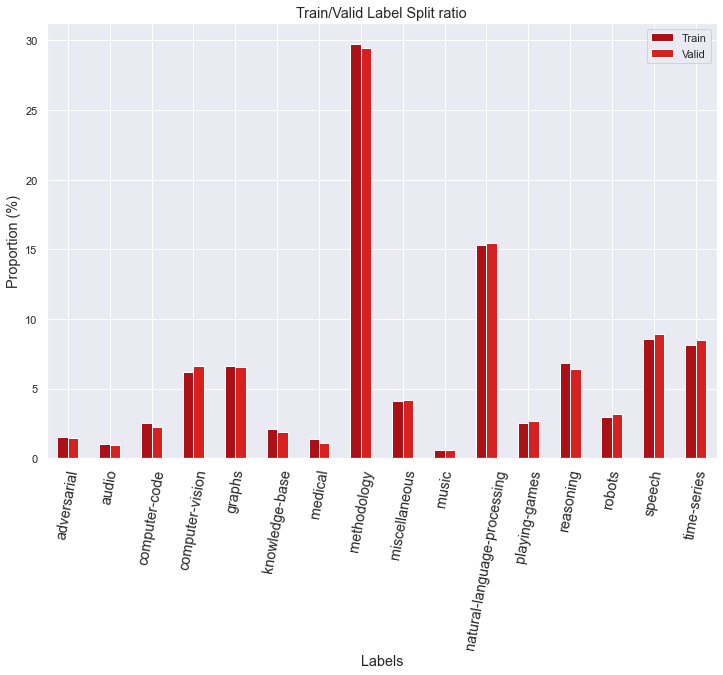

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))
(dist / dist.sum(axis=0) * 100).plot(kind='bar', ax=ax)
ax.set_title('Train/Valid Label Split ratio', size='large')
ax.set_xlabel('Labels', size='large')
ax.set_xticklabels(list(column2idx.values()), rotation=80, size='large')
ax.set_ylabel('Proportion (%)', size='large')